<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/s3/Data%20Science/Lab_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Breast_Cancer.csv to Breast_Cancer.csv


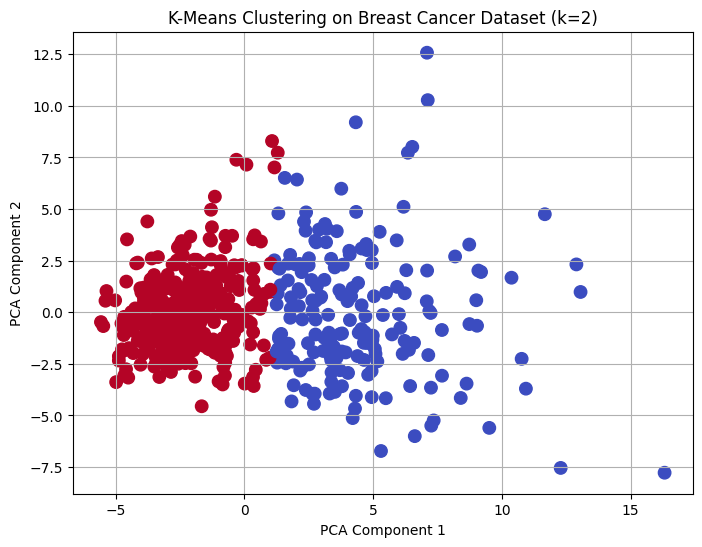


Approximate Clustering Accuracy for k=2: 0.9121
Confusion Matrix:
[[344  13]
 [ 37 175]]

Silhouette Score: 0.3447
Davies–Bouldin Index: 1.3093


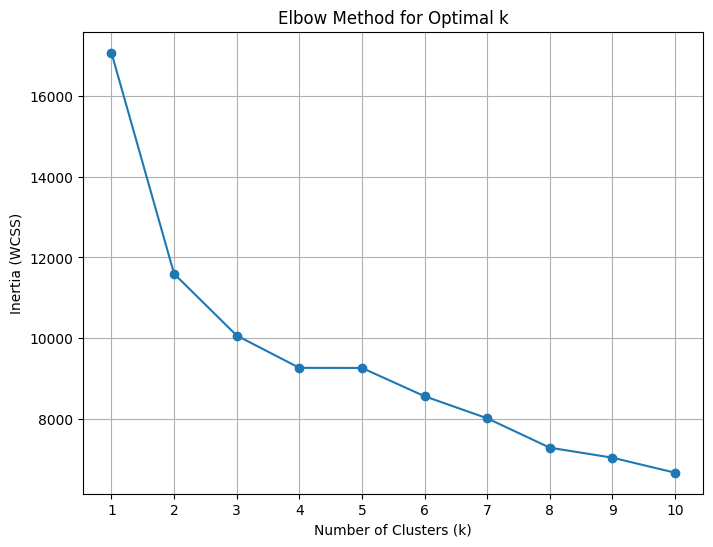

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load dataset (update filename if necessary)
df = pd.read_csv('Breast_Cancer.csv')

# Drop ID or unnamed columns if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed|id', case=False)]

# Encode target variable 'diagnosis' (M=1, B=0)
if 'diagnosis' in df.columns:
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Separate features and true labels
X = df.drop('diagnosis', axis=1)
y_true = df['diagnosis']

# Use only numeric columns
X = X.select_dtypes(include=[np.number])

# Handle missing values
X = X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with k = 2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm', s=80)
plt.title(f'K-Means Clustering on Breast Cancer Dataset (k={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Map clusters to true labels for approximate accuracy
labels = np.zeros_like(y_kmeans)
for i in range(k):
    mask = (y_kmeans == i)
    if np.sum(mask) > 0:
        labels[mask] = mode(y_true[mask])[0]

acc = accuracy_score(y_true, labels)
print(f"\nApproximate Clustering Accuracy for k={k}: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_true, labels))

# Evaluate cluster quality
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
db_index = davies_bouldin_score(X_scaled, y_kmeans)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"Davies–Bouldin Index: {db_index:.4f}")

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)
for k_i in k_range:
    km = KMeans(n_clusters=k_i, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()
